 Histogrammanpassung

 In dieser Ubung werden Sie das kumulative Histogramm eines Bildes berechnen. Mithilfe dieses
 Histogramms werden Sie dann ein Bild an das kumulative Histogramm eines anderen Bildes
 anpassen.
 1. Lesen Sie die Kapitel 5 (Punktoperationen- 5.2 Punktoperationen und Histogramme)
 und Kapitel 6 (Filter 6.1- 6.3) aus dem Buch Digitale Bildverarbeitung .
 2. Implementieren Sie eine Funktion, die aus einem 8-Bit-Graustufenbild das zugehorige
 kumulative Histogramm berechnet.
 • Prototyp: cumHisto = compute cumHisto(image)
 • Das image ist ein 8-Bit-Grauwert Bild

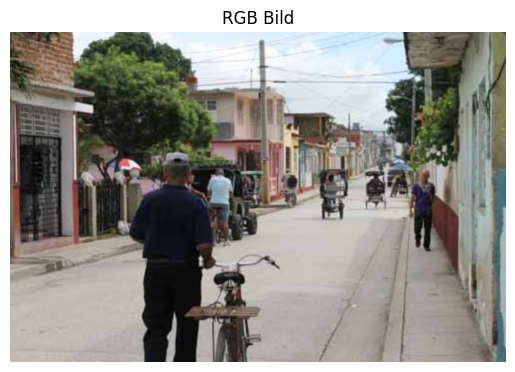

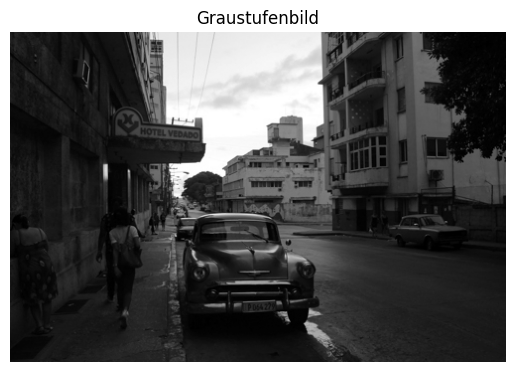

In [2]:
import skimage as ski
import os
from natsort import natsorted, ns
import numpy as np
import matplotlib.pyplot as plt

# Liste der Dateinamen (kann alternativ mit os.listdir und natsorted generiert werden)
list_files = ['bild01.jpg', 'bild02.jpg']

# Bilder einlesen
image_list = []
for file in list_files:
    image = ski.io.imread(file)
    image_list.append(image)

# Zeige das zweite Bild (RGB) an
plt.imshow(image_list[1])
plt.title("RGB Bild")
plt.axis('off')
plt.show()

def rgb_to_gray(rgb_img):
    """
    Wandelt ein RGB-Bild in ein 8-Bit Graustufenbild um
    (Berechnung nach der Luminosity-Methode).
    """
    # Berechnung der Graustufenwerte: 0.299*R + 0.587*G + 0.114*B
    # Achtung: skimage.io.imread liefert Bilder häufig im Format (H, W, Channels)
    grayscale_image = 0.299 * rgb_img[:, :, 0] + 0.587 * rgb_img[:, :, 1] + 0.114 * rgb_img[:, :, 2]
    
    # Umwandlung in Ganzzahlen im Bereich 0-255
    grayscale_image = grayscale_image.astype(np.uint8)
    return grayscale_image

# Konvertiere das erste Bild von RGB in Graustufen
img_rgb1 = image_list[0]
img_rgb2 = image_list[1]
img_gray1 = rgb_to_gray(img_rgb1)  # anzupassendes Bild (Bild01)
img_gray2 = rgb_to_gray(img_rgb2)  # Referenzbild (Bild02)

# Zeige das Graustufenbild an
plt.imshow(img_gray1, cmap='gray')
plt.title("Graustufenbild")
plt.axis('off')
plt.show()


Kumulatives Histogramm: [460, 1609, 2556, 7313, 8804, 11109, 13345, 16317, 17733, 19835, 22411, 23837, 26313, 27791, 29815, 32392, 34238, 36663, 39177, 42138, 45119, 48431, 51554, 54987, 58511, 62419, 65811, 68921, 72099, 75016, 77671, 80404, 82658, 85138, 87441, 89659, 91755, 93810, 95773, 97428, 98970, 100368, 101619, 102815, 103831, 104872, 105875, 106791, 107711, 108566, 109460, 110304, 111131, 111942, 112733, 113533, 114263, 114967, 115678, 116315, 117020, 117703, 118296, 118944, 119580, 120199, 120865, 121533, 122211, 122840, 123476, 124088, 124642, 125207, 125772, 126319, 126835, 127380, 127939, 128527, 129093, 129752, 130368, 131004, 131638, 132255, 132787, 133254, 133673, 134155, 134632, 135102, 135588, 136052, 136495, 136925, 137344, 137718, 138075, 138388, 138715, 139010, 139332, 139670, 140009, 140375, 140675, 141029, 141341, 141668, 141963, 142229, 142496, 142718, 142917, 143147, 143371, 143643, 143917, 144207, 144519, 144782, 144993, 145174, 145340, 145526, 145738, 145901

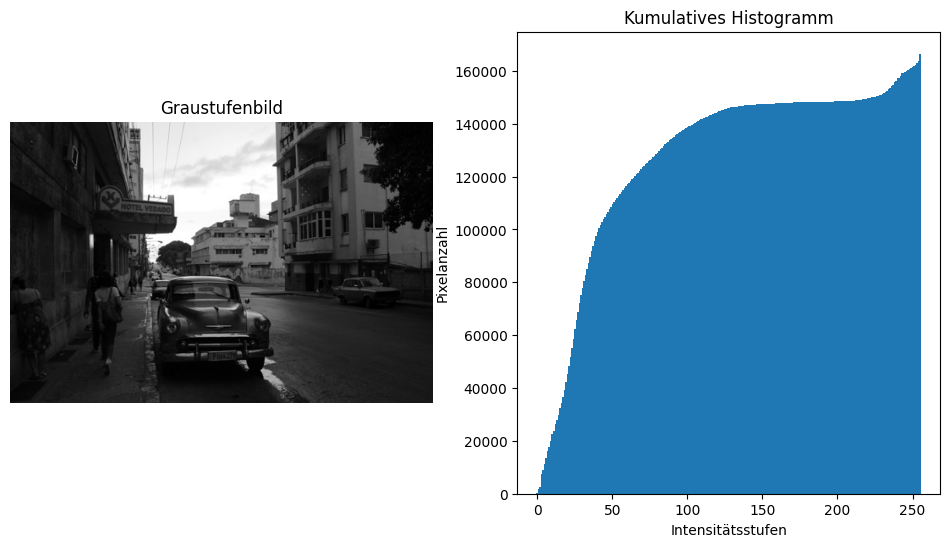

In [3]:
def compute_cumHisto(image):
    # Initialisiere das Histogramm mit 256 Nullen
    hist = [0] * 256

    # Berechne das Histogramm: Zähle die Vorkommen jeder Intensität
    for row in image:
        for pixel in row:
            hist[pixel] += 1

    # Berechne das kumulative Histogramm manuell
    cumHisto = [0] * 256
    cumHisto[0] = hist[0]
    for i in range(1, 256):
        cumHisto[i] = cumHisto[i - 1] + hist[i]
    
    return cumHisto

# Berechne das kumulative Histogramm für das Graustufenbild
cumHisto = compute_cumHisto(img_gray1)
print("Kumulatives Histogramm:", cumHisto)

def plot_hist(gray_image, hist):
    """
    Zeigt das Graustufenbild und sein Histogramm in einem Plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Zeige das Graustufenbild
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Graustufenbild")
    plt.axis("off")
    
    # Zeige das Histogramm
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(256), hist, width=1)
    plt.title("Kumulatives Histogramm")
    plt.xlabel("Intensitätsstufen")
    plt.ylabel("Pixelanzahl")
    
    plt.show()

# Zeige das Graustufenbild und das kumulative Histogramm zusammen
plot_hist(img_gray1, cumHisto)

cumHisto1 = compute_cumHisto(img_gray1)
cumHisto2 = compute_cumHisto(img_gray2)

 3. Beantworten Sie folgende Fragen:
 a. Was ist eine homogene und was eine nicht-homogene Punktoperation?
 b. Was ist der Unterschied zwischen Punktoperationen und Filteroperationen?


a. 

 4. Implementieren Sie eine Funktion, die das Bild01 an das Bild02 mittels Histogram
manpassung angleicht. Hierzu soll das kumulative Histogramm von Bild02 als Ref
erenzverteilung dienen und das Bild01 so verandert werden, dass sein kumulatives His
togramm an die Referenzverteilung angeglichen wird. Schliesslich soll das Referenzbild
 (02) und das verarbeitete Bild (01) und deren kumulativen Histogramme angezeigt wer
den.
 • Prototyp: LUT = match Histo(img histo, ref histo)
 • img histo: Histogramm des anzupassenden Bildes.
 • ref histo: Histogramm des Referenzbildes.
 • LUT: Die Lookup Tabelle, welche auf das anzupassende Bild angewendet, die
 Histogrammanpassung durchfuhrt

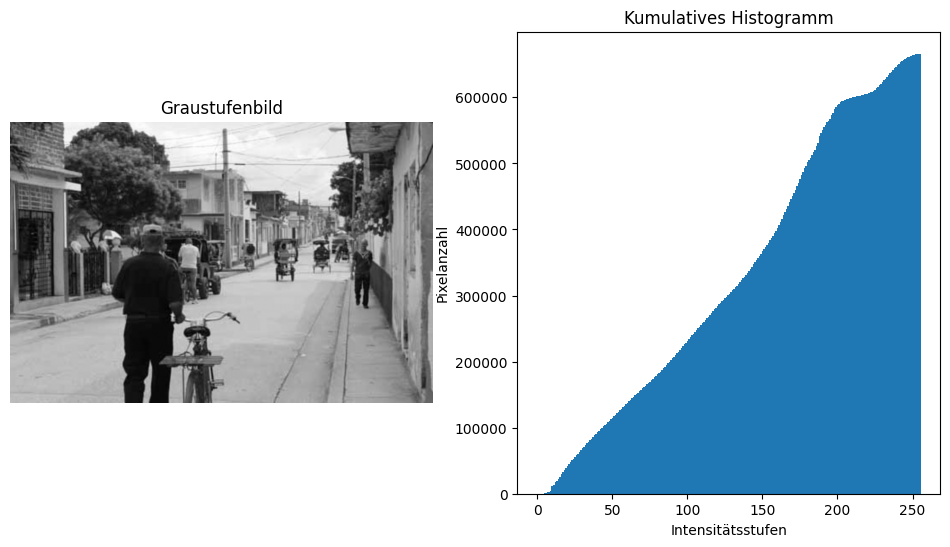

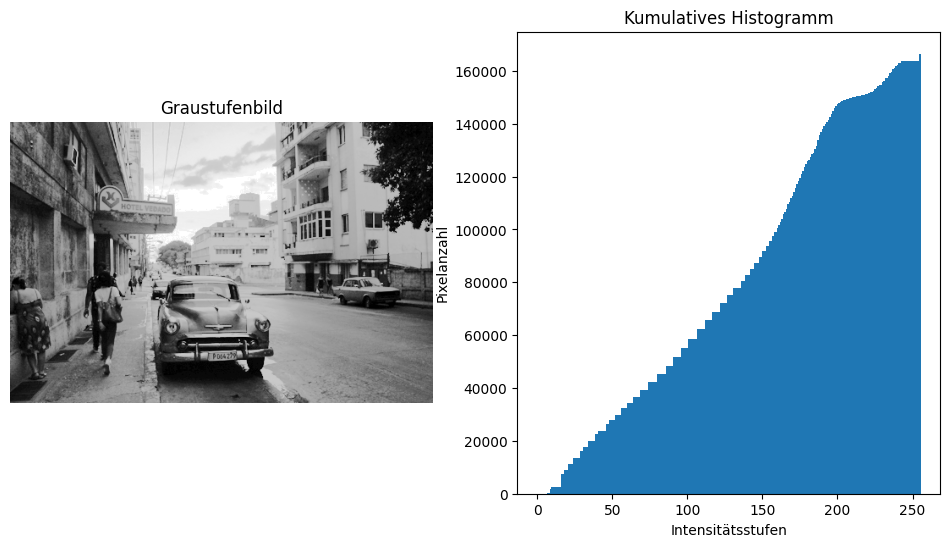

In [ ]:
cumHisto1 = compute_cumHisto(img_gray1)
cumHisto2 = compute_cumHisto(img_gray2)

# --- Histogrammanpassung mittels Lookup-Tabelle ---

def match_Histo(img_histo, ref_histo):
    LUT = [0] * 256
    # Gesamtanzahl an Pixeln in den Bildern
    total_img = img_histo[-1]
    total_ref = ref_histo[-1]
    
    # Normalisierte kumulative Verteilungen (CDFs)
    cdf_img = [val / total_img for val in img_histo]
    cdf_ref = [val / total_ref for val in ref_histo]
    
    # Für jeden Intensitätswert in Bild01: finde den Referenzwert,
    # dessen CDF möglichst nahe liegt.
    for i in range(256):
        # Minimale Differenz initialisieren
        diff_min = 1.0
        LUT_val = 0
        for j in range(256):
            diff = abs(cdf_img[i] - cdf_ref[j])
            if diff < diff_min:
                diff_min = diff
                LUT_val = j
        LUT[i] = LUT_val
    
    return LUT

# Erzeuge die Lookup-Tabelle
LUT = match_Histo(cumHisto1, cumHisto2)

# --- LUT auf Bild01 anwenden ---

def apply_LUT(image, LUT):
    # Da image ein NumPy-Array ist, können wir die LUT direkt anwenden
    LUT_arr = np.array(LUT, dtype=np.uint8)
    return LUT_arr[image]

matched_img = apply_LUT(img_gray1, LUT)

# --- Ergebnisse anzeigen ---

def plot_hist(gray_image, cum_hist):
    """
    Zeigt ein Graustufenbild und sein kumulatives Histogramm in einem Plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Graustufenbild
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Graustufenbild")
    plt.axis("off")
    
    # Kumulatives Histogramm
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(256), cum_hist, width=1)
    plt.title("Kumulatives Histogramm")
    plt.xlabel("Intensitätsstufen")
    plt.ylabel("Pixelanzahl")
    
    plt.show()

# Zeige das Referenzbild (Bild02) und sein kumulatives Histogramm
plot_hist(img_gray2, cumHisto2)

# Zeige das angeglichene Bild (Bild01) und sein kumulatives Histogramm
cumHisto_matched = compute_cumHisto(matched_img)
plot_hist(matched_img, cumHisto_matched)

 Wieso mussen die beiden Histogramme des Referenz- und des Orginalbildes normiert
 sein? (Denken Sie an den Histogrammausgleich)

 Die Nomierung sorgt dafür, das beide kommulativen Verteilungen in einem gemeinsamen Wertebereicht liegen und direkt vergleichbar sind. Ohne die Normierung würden Unterschiede in der Bildgöße oder Helligkeitsverteilungen zu ungleichen absoluten CDFs führen. Dadurch wird der Histogrammausgleich rein auf relativen Häufigkeiten basiert und nicht auf absoluten Pixeln